In [20]:
#import all the things

%reset
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime
import os
import numpy as np
import cmocean as cm
from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools, viz_tools)
import xarray as xr 
import subprocess 
import cmocean
from matplotlib import reload
import glob
import phys_map as pm
from scipy.io import loadmat
import netCDF4 as nc

%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
reload(pm)

## What do we need?

In [21]:
resdir = '/data/tjarniko/m23_01/'
ptrc = 'SalishSea_1ts_20171026_20171026_ptrc_T.nc'
tg = 'SalishSea_1ts_20171026_20171026_grid_T.nc'
vg = 'SalishSea_1ts_20171026_20171026_grid_V.nc'
ug = 'SalishSea_1ts_20171026_20171026_grid_U.nc'
wg = 'SalishSea_1ts_20171026_20171026_grid_W.nc'


In [22]:
alldat = nc.Dataset('/data/tjarniko/results/may10_a1/SKOG_1h_20160101_20160115_grid_U.nc')
print(alldat)
#resdir = '/data/tjarniko/results/may10_a1'
#subprocess.call('ncks -v depthu SKOG_1h_20160101_20160115_grid_U.nc zlevels_1h.nc', shell=True,cwd=resdir)
depthus = nc.Dataset('/data/tjarniko/results/may10_a1/zlevels_1h.nc')
print(depthus)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: SKOG_1h_20160101_20160115
    description: ocean U grid variables
    title: ocean U grid variables
    Conventions: CF-1.6
    timeStamp: 2018-May-12 01:57:49 GMT
    uuid: faedcd39-2aac-407f-9d72-539f8c266741
    dimensions(sizes): axis_nbounds(2), x(398), y(898), nvertex(4), depthu(40), time_counter(360)
    variables(dimensions): float32 nav_lat(y,x), float32 nav_lon(y,x), float32 bounds_lon(y,x,nvertex), float32 bounds_lat(y,x,nvertex), float32 area(y,x), float32 depthu(depth), float32 depthu_bounds(depth,axis_nbounds), float32 vozocrtx(time_counter,depth,y,x), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter,axis_nbounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter,axis_nbounds)
    groups: 

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: SKOG_1h_20160101_20160115
    descri

In [23]:
thistime = nc.Dataset('/data/tjarniko/results/may10_a1/timecount_1h.nc')
us = nc.Dataset('/data/tjarniko/results/may10_a1/u_1h.nc')
vs = nc.Dataset('/data/tjarniko/results/may10_a1/v_1h.nc')
print(vs)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: SKOG_1h_20160101_20160115
    description: ocean V grid variables
    title: ocean V grid variables
    Conventions: CF-1.6
    timeStamp: 2018-May-12 01:57:51 GMT
    uuid: 37ab8efd-8a30-40b4-bc67-94f2283a19ea
    history: Thu May 24 16:10:44 2018: ncks -v vomecrty SKOG_1h_20160101_20160115_grid_V.nc v_1h.nc
    NCO: 4.4.2
    dimensions(sizes): y(898), x(398), nvertex(4), depthv(40), axis_nbounds(2), time_counter(360)
    variables(dimensions): float32 bounds_lat(y,x,nvertex), float32 bounds_lon(y,x,nvertex), float32 depthv(depthv), float32 depthv_bounds(depthv,axis_nbounds), float32 nav_lat(y,x), float32 nav_lon(y,x), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter,axis_nbounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter,axis_nbounds), float32 vomecrty(time_counter,depthv,y,x)
    groups: 



In [24]:
# trac = nc.Dataset(resdir + ptrc)

# tgd = nc.Dataset(resdir + tg)
# vgd = nc.Dataset(resdir + vg)
# ugd = nc.Dataset(resdir + ug)
# wgd = nc.Dataset(resdir + wg)

# print(trac)
# print('**V**')
# print(vgd)
# print('**U**')
# print(ugd)
# print('**W**')
# print(wgd)

In [25]:
ugrid = us.variables['vozocrtx']
vgrid = vs.variables['vomecrty']
zlevels = depthus.variables['depthu']
timesteps = thistime.variables['time_counter']

#print(ugrid.shape)
#print(zlevels.shape)
print(timesteps.shape)

(360,)


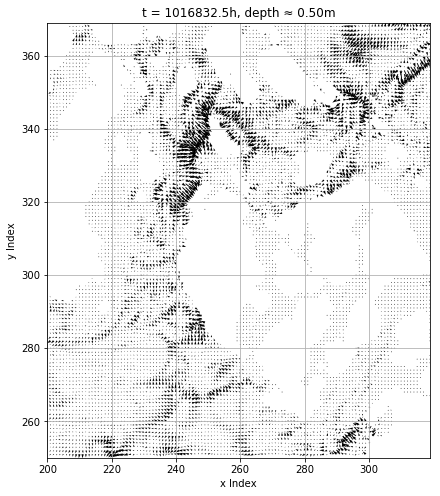

In [26]:
# Define the slice to plot
t, zlevel = 0, 0
y_slice = np.arange(250, 370)
x_slice = np.arange(200, 320)
# Slice and mask the arrays
ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice, x_slice], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice, x_slice], 0)
# "Unstagger" the velocity values by interpolating them to the T-grid points
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)
# Plot the velocity vectors
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
ax.quiver(x_slice[1:], y_slice[1:], u_tzyx, v_tzyx)
# Axes limits and grid
ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()
# Axes label and title
ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))


In [27]:
bathy = nc.Dataset('/data/dlatorne/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

In [28]:
# t, zlevel = 0, 0
# y_slice = np.arange(0, 898)
# x_slice = np.arange(0, 398)

# ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice, x_slice], 0)
# vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice, x_slice], 0)
# u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)

# fig, axs = plt.subplots(1, 2, figsize=(16, 8))
# densities = (0.5, 2)
# for ax, density in zip(axs, densities):
#     viz_tools.set_aspect(ax)

#     ax.streamplot(
#         x_slice[1:], y_slice[1:], u_tzyx, v_tzyx,
#         density=density,
#     )
#     viz_tools.plot_land_mask(ax, bathy, xslice=x_slice, yslice=y_slice)

#     ax.set_xlim(x_slice[0], x_slice[-1])
#     ax.set_ylim(y_slice[0], y_slice[-1])
#     ax.grid()

#     ax.set_xlabel('x Index')
#     ax.set_ylabel('y Index')
#     ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))


slice defined
done unstaggering


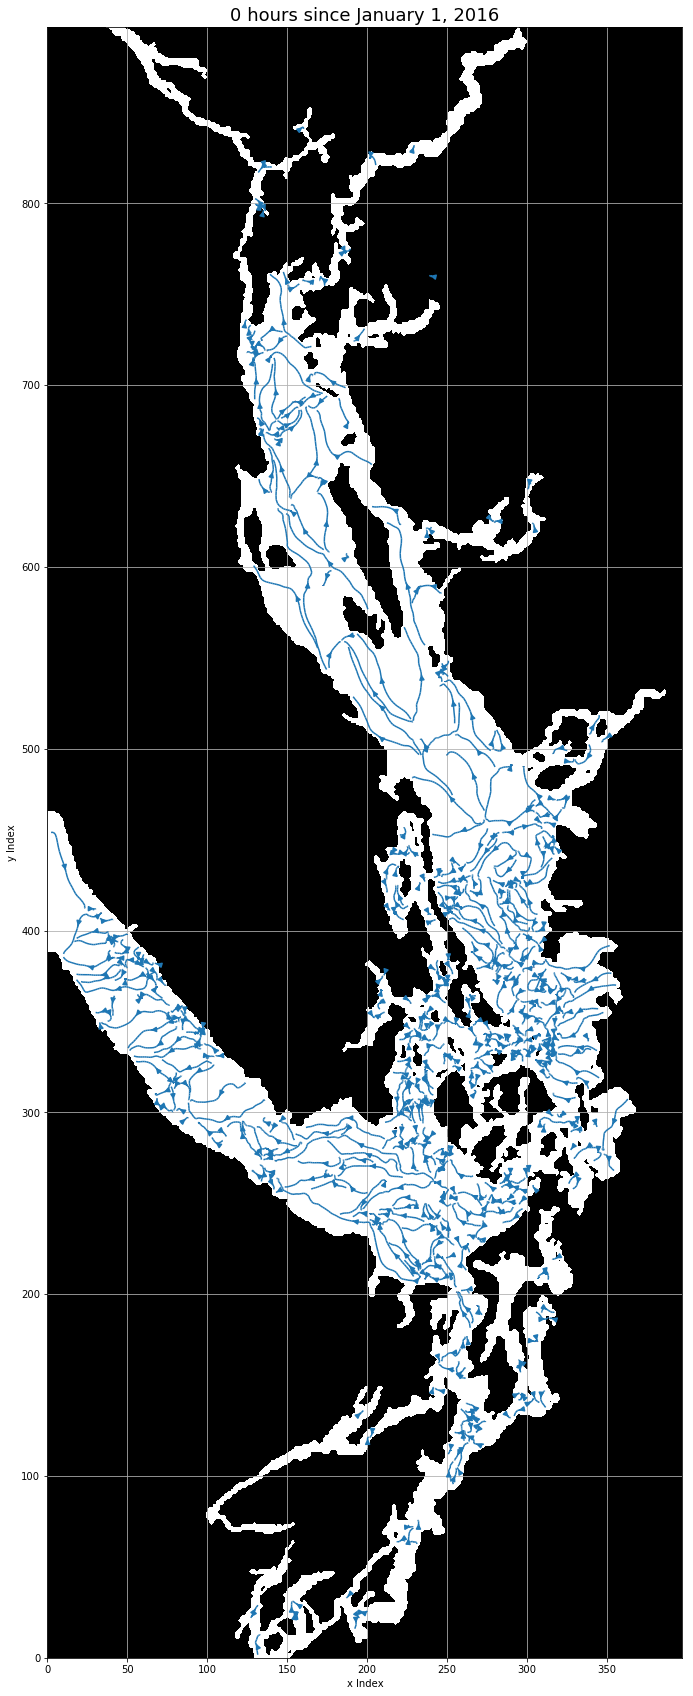

In [34]:
t, zlevel = 0, 0
y_slice = np.arange(0, 898)
x_slice = np.arange(0, 398)
print('slice defined')
ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice, x_slice], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice, x_slice], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)
print('done unstaggering')
fig, ax = plt.subplots(1, 1, figsize=(60, 30))
density = 10
# for ax, density in zip(axs, densities):
viz_tools.set_aspect(ax)

ax.streamplot(
    x_slice[1:], y_slice[1:], u_tzyx, v_tzyx,
    density=density,
)
viz_tools.plot_land_mask(ax, bathy, xslice=x_slice, yslice=y_slice)

ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()

ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
tit = str(t) + ' hours since January 1, 2016'
ax.set_title(tit, fontsize = 18)
